# Minize Functions

### Notebook to explore the convergence of optimization functions

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import time
from scipy.optimize import minimize
from matplotlib.animation import FuncAnimation

%matplotlib notebook


In [104]:
def eval_function(x):
    return x**2

def eval_function(x):
    return x**2 + 5*x

def eval_function(x):
    return (np.sin(1/2 * x) + 2 * np.cos(1/2 * x)) * x**2

In [105]:
def plot_function(func, x):
    fig, ax = plt.subplots()
    ax.plot(x, func(x), 'b')
    

In [106]:
seed = 42  # Puedes cambiar esta semilla a la que desees
upper_limit = 10
lower_limit = -10

In [107]:
np.random.seed(seed)
x0 = np.random.uniform(lower_limit, upper_limit)
print('Initial value is {}'.format(x0))

x = np.linspace(-10, 10, 1000)
# plot_function(objetive_function2, x)

# List to save each function evaluation: x value and function value
evaluation_list = []
iteration_list = []

def objetive_function(x):
    eval_result = eval_function(x)
    evaluation_list.append(np.array([x[0], eval_result[0]]))
    return eval_result

# Callback funtion to save each iteration retsult: x value and function value
def iteration_call(x):
    function_value = eval_function(x)
    iteration_list.append(np.array([x[0], function_value[0]]))

# Apply function
result = minimize(objetive_function, x0, method='SLSQP', bounds=[(lower_limit, upper_limit)], options={'disp': True}, callback=iteration_call)

evaluation_arr = np.vstack(evaluation_list)
iteration_arr = np.vstack(iteration_list)

Initial value is -2.50919762305275
Optimization terminated successfully    (Exit mode 0)
            Current function value: -79.45293649148688
            Iterations: 7
            Function evaluations: 18
            Gradient evaluations: 7


In [108]:
evaluation_list
iteration_list

[array([-10.        , 152.62486456]),
 array([-10.        , 152.62486456]),
 array([-10.        , 152.62486456]),
 array([ -6.87322903, -76.66460008]),
 array([ -6.46630863, -79.45286322]),
 array([ -6.46413586, -79.45293649]),
 array([ -6.46413586, -79.45293649])]

<IPython.core.display.Javascript object>


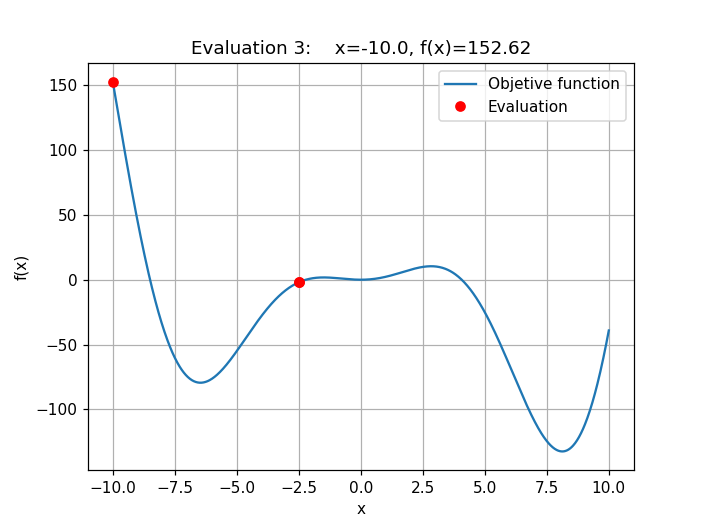

In [109]:
fig, ax = plt.subplots()
ax.plot(x, eval_function(x), label='Objetive function')
points_plot, = ax.plot([], [], marker='o', linestyle='', label='Evaluation', color = 'r')

# Initialize the plot
def init():
    points_plot.set_data([], [])
    return points_plot,

# Update the plot for each row
def update(frame):
    x_values = evaluation_arr[:frame + 1 ,0]
    y_values = evaluation_arr[:frame + 1, 1]
    r_x = round(x_values[-1], 2)
    r_y = round(y_values[-1], 2)
    
    points_plot.set_data(x_values, y_values)
    ax.set_title('Evaluation {}:    x={}, f(x)={}'.format(frame + 1, r_x, r_y))

    return points_plot,

# Create the animation
num_frames = evaluation_arr.shape[0]
ani = FuncAnimation(fig, update, 
                    frames=num_frames, 
                    init_func=init, 
                    blit=True, 
                    interval = 500)

# Add labels and legend
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.legend()

# Show the animation
plt.grid(True)
plt.show()